# Advertising Click Prediction using Machine Learning

This project aims to predict whether a user will click on an ad based on features like age, internet usage, and browsing behavior. Several classification algorithms are applied, evaluated, and compared using test performance and cross-validation.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, silhouette_score, adjusted_rand_score

from google.colab import drive
import os

sns.set(style='whitegrid')

In [15]:
url = 'https://raw.githubusercontent.com/Amrafik/ad-click-prediction-Machine-Learning-Project/refs/heads/main/advertising.csv'
df = pd.read_csv(url)
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0   2016-03-27 0:53:11              0  
1   2016-04-04 1:39:02              0  
2  2016-03-13 20:35:42              0  
3   2016-01-10 2:31:19              0  
4   2016-06-03 3:36:18              0

## 1. Data Exploration and Previewing

In [ ]:
print("Data Info:")
print(df.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB
None


In [ ]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

In [ ]:
print("\nNull values per column:")
print(df.isnull().sum())


Null values per column:
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Weekday'] = df['Timestamp'].dt.day_name()

In [ ]:
df_numeric = df.drop(columns=['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Weekday'])

In [ ]:
print("Descriptive Statistics:")
df_numeric.describe()

Descriptive Statistics:


Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad         Hour  \
count           1000.000000  1000.000000     1000.00000  1000.000000   
mean             180.000100     0.481000        0.50000    11.660000   
std               43.902339     0.499889        0.50025     6.960952   
min              104.780000     0.000000        0.00000     0.000000   
25%              138.830000     0.000000        0.00000     6.000000   
50%              183.130000     0.000000        0.50000    12.000000   
75%              218.792500     1.000000        1.00000    18.000000   
max              269.960000     1.000000        1.00000    23.000000   

               Day        Month  
count  1000.000000  1000.000000  
mean     15.484000     3.817000  
std       8.734073     1.926973  
min       1.000000     1.000000  
25%       8.000000     2.000000  
50%      15.000000     4.000000  
75%      23.000000     5.000000  
max      31.000000     7.000000

In [ ]:
print("Correlation Matrix:")
df_numeric.corr()

Correlation Matrix:


Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   
Hour                                      0.000895 -0.049905     0.034573   
Day                                      -0.011217 -0.038162    -0.026523   
Month                                    -0.010920  0.023689    -0.050216   

                          Daily Internet Usage      Male  Clicked on Ad  \
Daily Time Spent on Site              0.518658 -0.018951      -0.748117   
Age                                  -0.367209 -0.021044       0.492531   
Area Income                           0.337496  0.001322      -0.476255   
Daily Internet Usage                  1.000000  0.028012      -0.786539   
Male                                  0.028012  1.000000      -0.038027   
Clicked on Ad                        -0.786539 -0.038027       1.000000   
Hour                                  0.074347  0.058552      -0.047431   
Day                                  -0.012531 -0.013253      -0.005269   
Month                                 0.017530  0.005220       0.016095   

                              Hour       Day     Month  
Daily Time Spent on Site  0.000895 -0.011217 -0.010920  
Age                      -0.049905 -0.038162  0.023689  
Area Income               0.034573 -0.026523 -0.050216  
Daily Internet Usage      0.074347 -0.012531  0.017530  
Male                      0.058552 -0.013253  0.005220  
Clicked on Ad            -0.047431 -0.005269  0.016095  
Hour                      1.000000 -0.017064 -0.013748  
Day                      -0.017064  1.000000 -0.017274  
Month                    -0.013748 -0.017274  1.000000

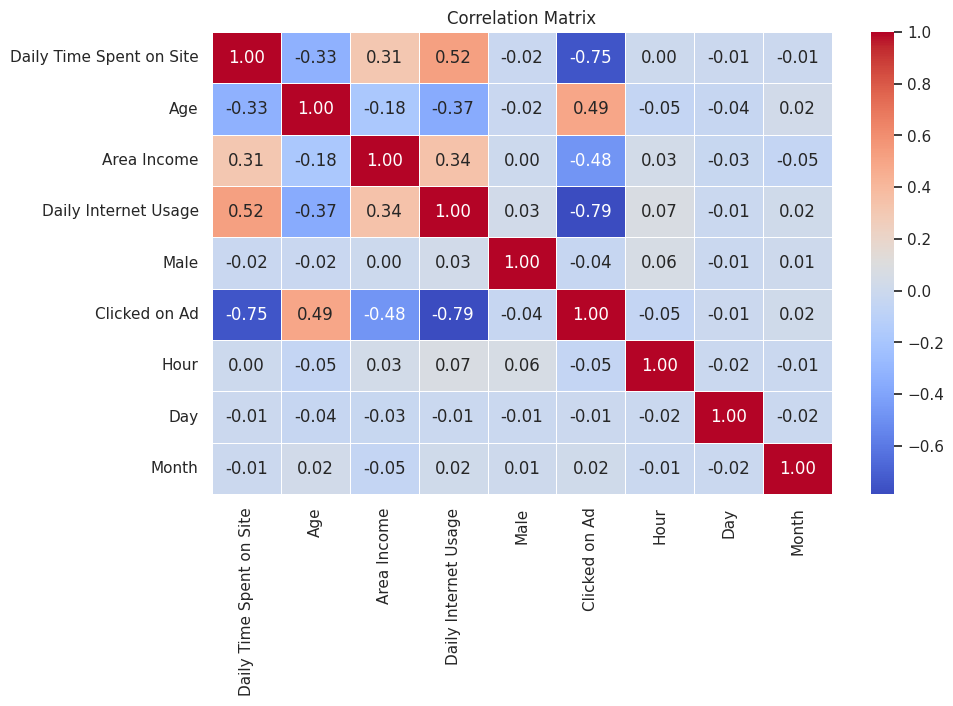

In [ ]:
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
print("Value Counts for 'Clicked on Ad':")
print(df['Clicked on Ad'].value_counts())

Value Counts for 'Clicked on Ad':
Clicked on Ad
0    500
1    500
Name: count, dtype: int64


Text(0.5, 0, 'Age')

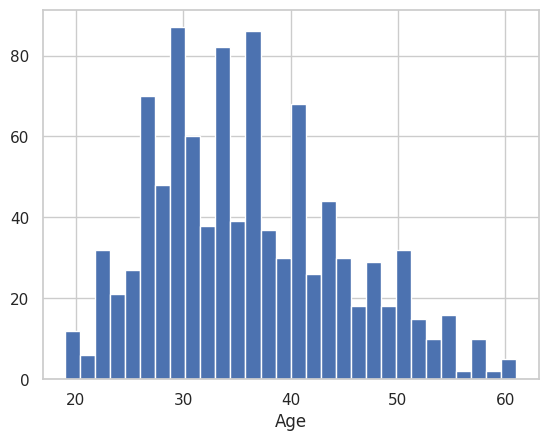

In [ ]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

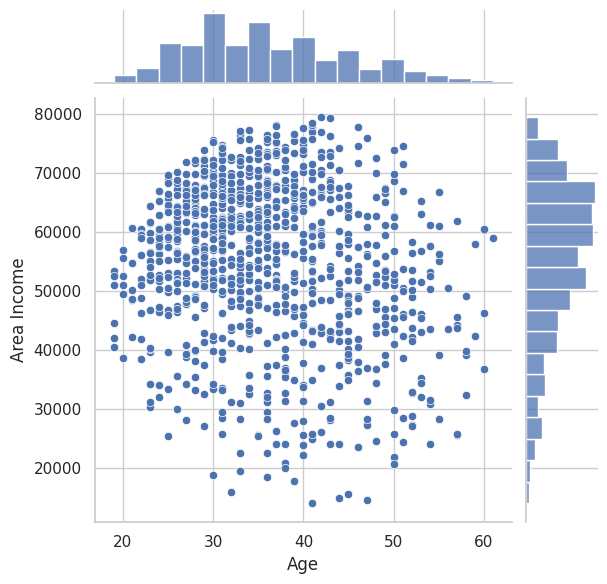

In [ ]:
sns.jointplot(x='Age',y='Area Income',data=df)

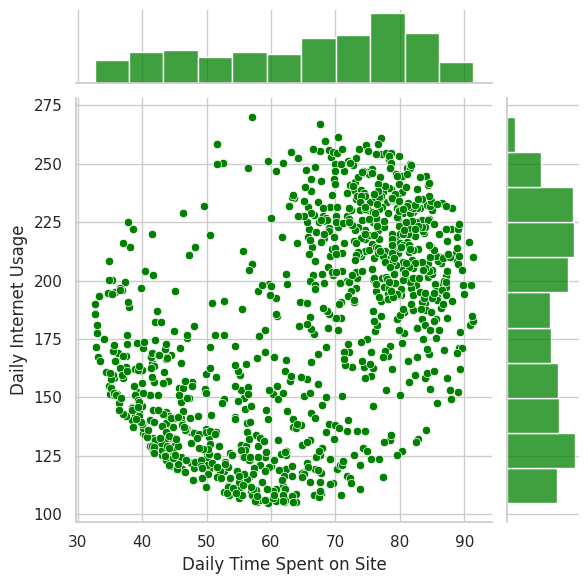

In [ ]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df ,color='green')

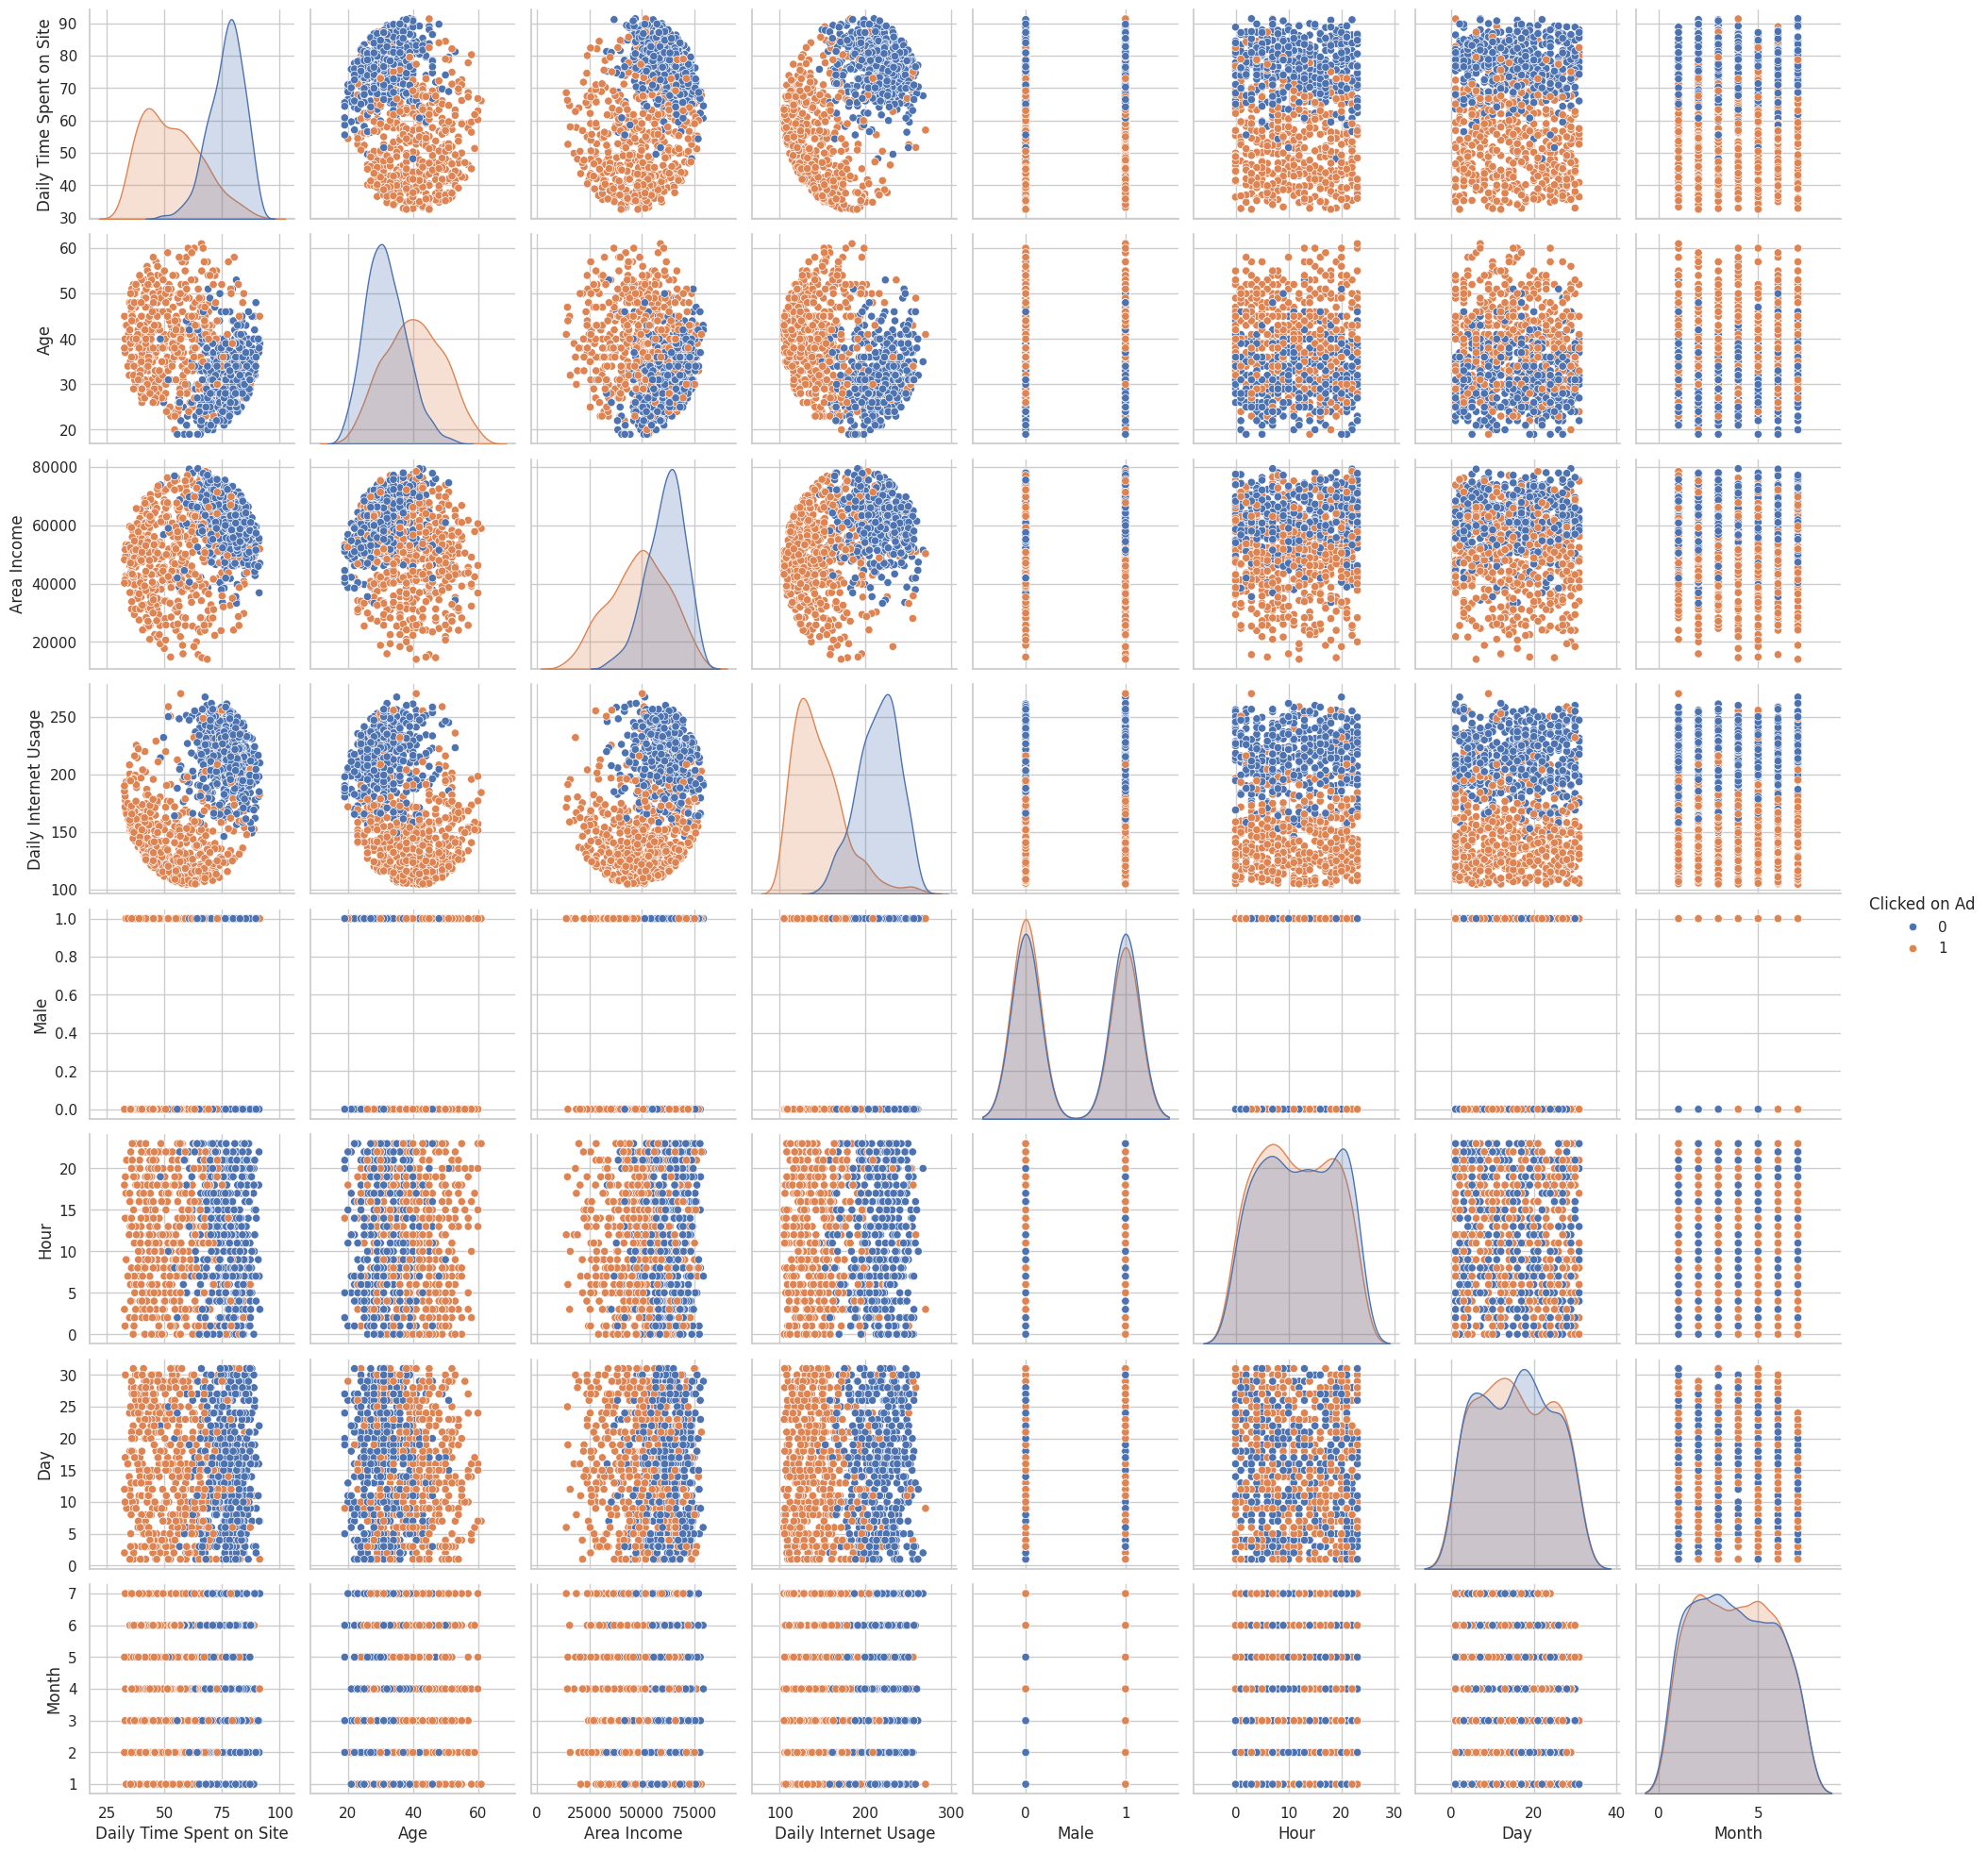

In [ ]:
sns.pairplot(df, hue='Clicked on Ad')

/tmp/ipython-input-2806765284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df, ax=axes[0, 0], palette='Set2')
/tmp/ipython-input-2806765284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df, ax=axes[0, 1], palette='Set2')
/tmp/ipython-input-2806765284.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Area Income', data=df, ax=axes[1, 0], palette='Set2')
/tmp/ipython-input-2806765284.py:11: FutureWarning:

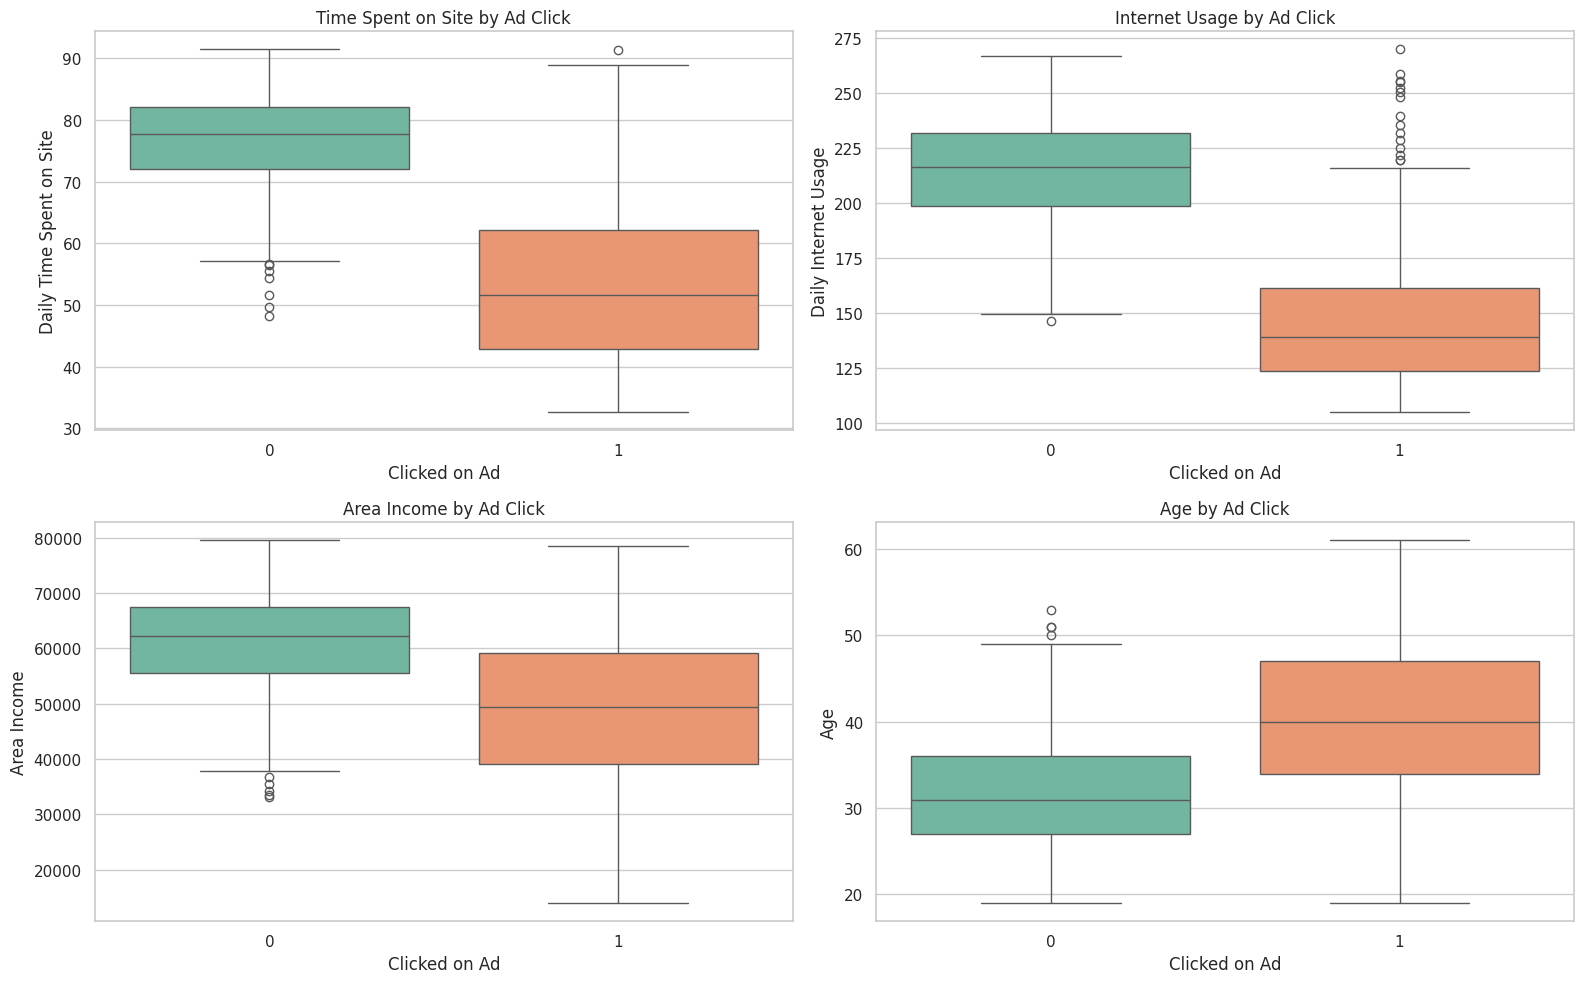

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df, ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Time Spent on Site by Ad Click')

sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df, ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Internet Usage by Ad Click')

sns.boxplot(x='Clicked on Ad', y='Area Income', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Area Income by Ad Click')

sns.boxplot(x='Clicked on Ad', y='Age', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Age by Ad Click')

plt.tight_layout()
plt.show()

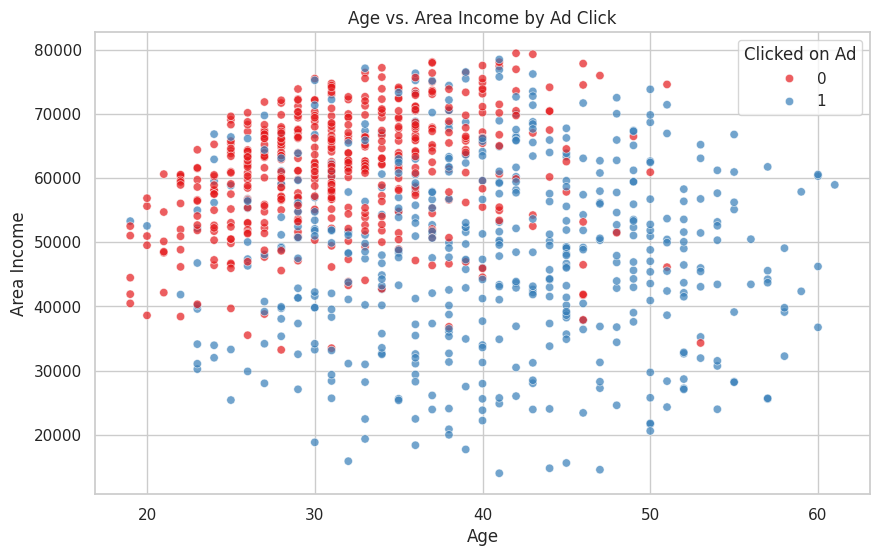

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Area Income', hue='Clicked on Ad', palette='Set1', alpha=0.7)
plt.title('Age vs. Area Income by Ad Click')
plt.show()

## Insights of Graphs
1. Balanced Target:

   •Equal number of users clicked and didn’t click ads.

5. Age

   •Older users click more ads than younger ones.

7. Correlations

  •Negative: Internet Usage, Time on Site
  
  •Positive: Age

## 2. Data Preprocessing

In [ ]:
# Define X and y
X = df_numeric.drop(columns='Clicked on Ad')
y = df_numeric['Clicked on Ad']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

Training samples: 700
Testing samples: 300


In [ ]:
numeric_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                    'Daily Internet Usage', 'Hour', 'Day', 'Month']

categorical_features = ['Male']

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_scaled_numeric = scaler.transform(X_test[numeric_features])

X_train_processed = np.hstack((X_train_scaled_numeric, X_train[categorical_features].values))
X_test_processed = np.hstack((X_test_scaled_numeric, X_test[categorical_features].values))

print("Shape after preprocessing (train):", X_train_processed.shape)
print("Shape after preprocessing (test):", X_test_processed.shape)

# Define df_model for unsupervised learning section
df_model = df[numeric_features]

Shape after preprocessing (train): (700, 8)
Shape after preprocessing (test): (300, 8)


## 3. Training & Evaluating Models

## 3.1 Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_processed, y_train)
y_pred_lr = lr_model.predict(X_test_processed)

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       146
           1       0.98      0.94      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
y_train_pred_lr = lr_model.predict(X_train_processed)

acc_train = accuracy_score(y_train, y_train_pred_lr)
acc_test = accuracy_score(y_test, y_pred_lr)

print(f"Train Accuracy: {acc_train:.4f}")
print(f"Test Accuracy : {acc_test:.4f}")

Train Accuracy: 0.9757
Test Accuracy : 0.9600


/tmp/ipython-input-2723507052.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


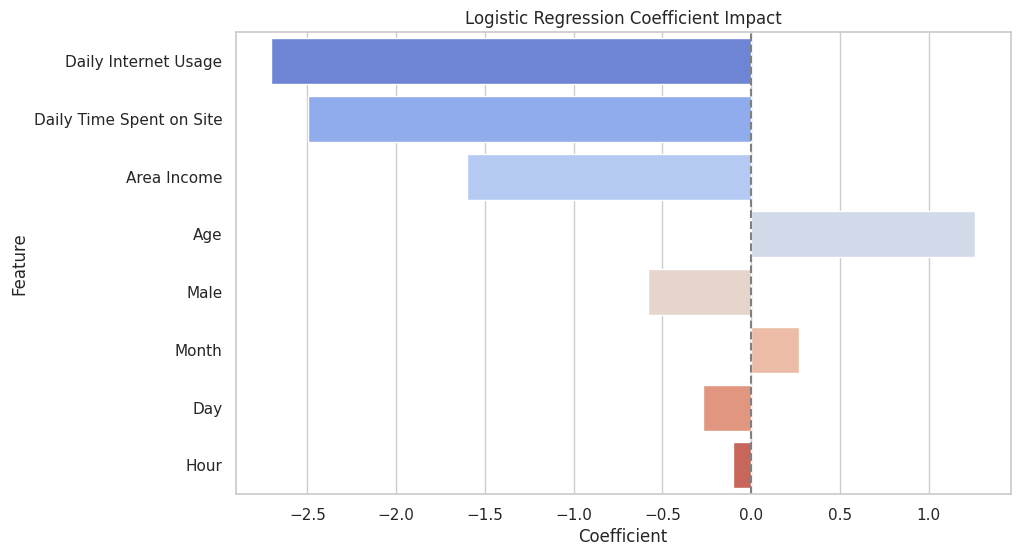

In [ ]:
# Logistic Regression Coefficients
model = lr_model

coefficients = model.coef_[0]
feature_names = numeric_features + categorical_features

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Logistic Regression Coefficient Impact')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

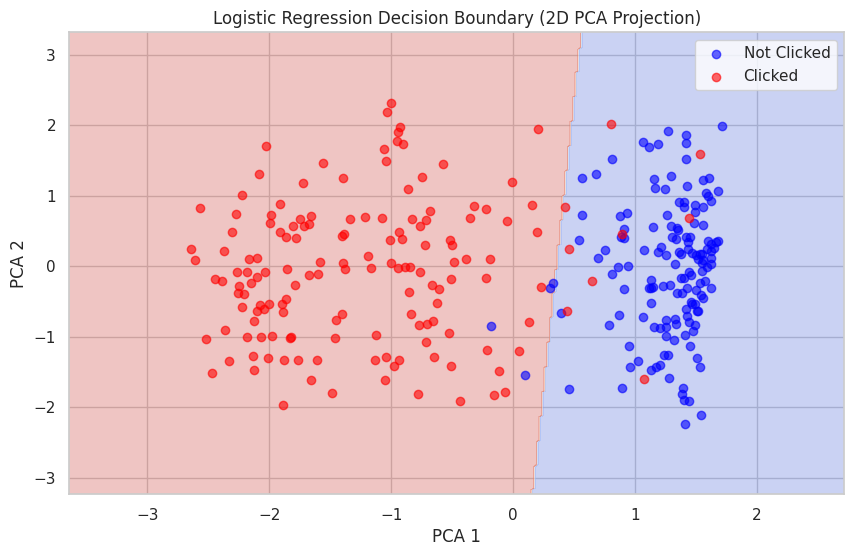

In [ ]:
# PCA for plotting 2-Dimenstions
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_processed)
X_test_2d = pca.transform(X_test_processed)

model_2d = LogisticRegression()
model_2d.fit(X_train_2d, y_train)

x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_test_2d[y_test==0][:, 0], X_test_2d[y_test==0][:, 1], color='blue', label='Not Clicked', alpha=0.6)
plt.scatter(X_test_2d[y_test==1][:, 0], X_test_2d[y_test==1][:, 1], color='red', label='Clicked', alpha=0.6)
plt.title("Logistic Regression Decision Boundary (2D PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()

## 3.2 Decision Tree

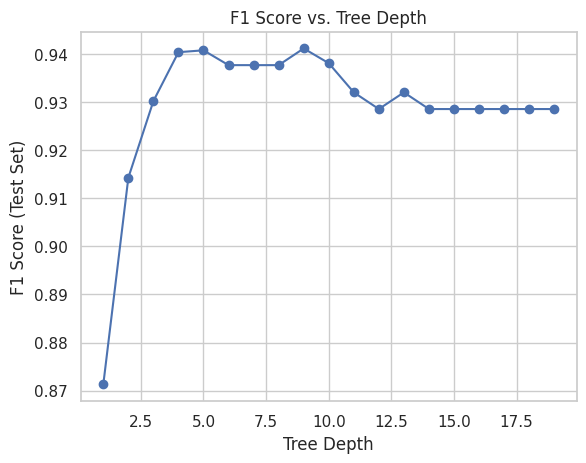

In [ ]:
#HyperParameter Tuning
depths = range(1, 20)
f1_scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train_processed, y_train)
    preds = model.predict(X_test_processed)
    f1 = f1_score(y_test, preds)
    f1_scores.append(f1)

plt.plot(depths, f1_scores, marker='o')
plt.title("F1 Score vs. Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("F1 Score (Test Set)")
plt.grid(True)
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_processed, y_train)
y_pred_dt = dt_model.predict(X_test_processed)

# Metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print Report
print("Decision Tree Report")
print(classification_report(y_test, y_pred_dt))

Decision Tree Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       146
           1       0.95      0.93      0.94       154

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [ ]:
print("Tree depth:", dt_model.get_depth())
print("Number of leaves:", dt_model.get_n_leaves())

Tree depth: 5
Number of leaves: 20


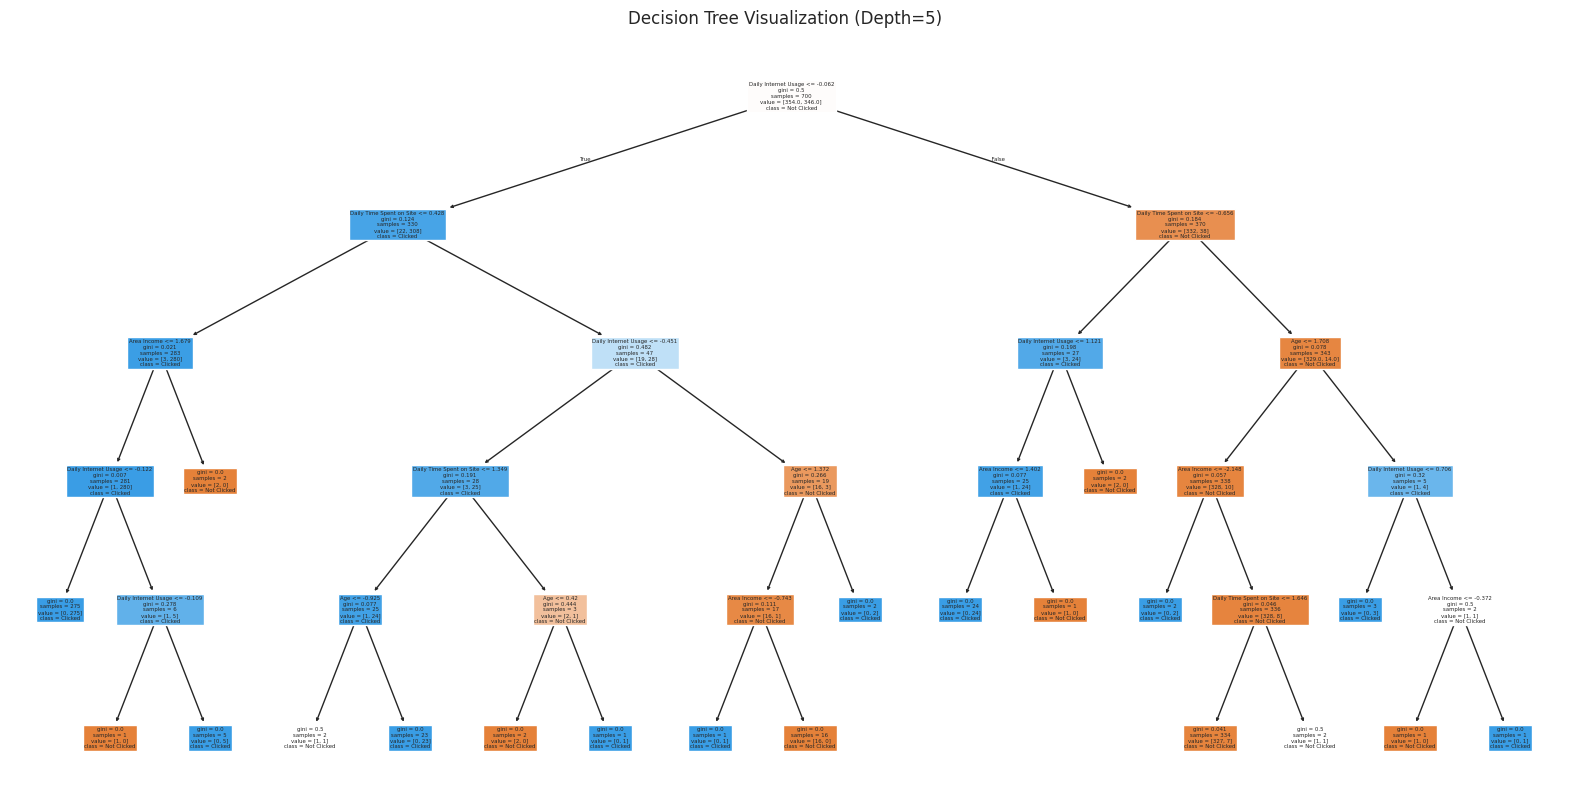

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=numeric_features + categorical_features,
    class_names=['Not Clicked', 'Clicked'],
    max_depth=5
)
plt.title('Decision Tree Visualization (Depth=5)')
plt.show()

## 3.3 Random Forest

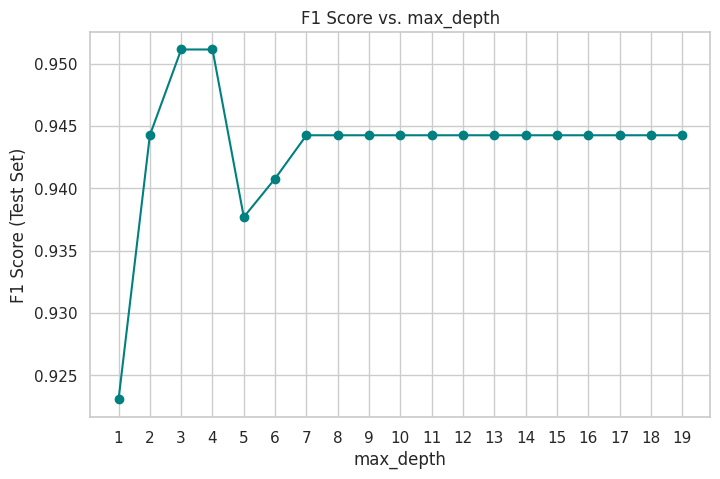

In [ ]:
# HyperParameter Tuning
depths = range(1, 20)
f1_scores = []

for d in depths:
    model = RandomForestClassifier(max_depth=d, random_state=42)
    model.fit(X_train_processed, y_train)
    preds = model.predict(X_test_processed)
    f1 = f1_score(y_test, preds)
    f1_scores.append(f1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(depths, f1_scores, marker='o', color='teal')
plt.title("F1 Score vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("F1 Score (Test Set)")
plt.grid(True)
plt.xticks(depths)
plt.show()

In [ ]:
# Random Forest (Regularized to prevent overfitting)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,               # limit depth to prevent overfitting
    min_samples_split=10,      # at least 10 samples to split a node
    min_samples_leaf=5,        # at least 5 samples in a leaf
    max_features='sqrt',       # use a subset of features (common default)
    random_state=42
)

rf_model.fit(X_train_processed, y_train)
y_pred_rf = rf_model.predict(X_test_processed)

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Report (Regularized)")
print(classification_report(y_test, y_pred_rf))

Random Forest Report (Regularized)
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       146
           1       0.95      0.96      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
# Predictions on training set
y_train_pred_rf = rf_model.predict(X_train_processed)

# Metrics
acc_train = accuracy_score(y_train, y_train_pred_rf)
acc_test = accuracy_score(y_test, y_pred_rf)

print(f"Train Accuracy: {acc_train:.4f}")
print(f"Test Accuracy : {acc_test:.4f}")

Train Accuracy: 0.9800
Test Accuracy : 0.9533


/tmp/ipython-input-2828637895.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')


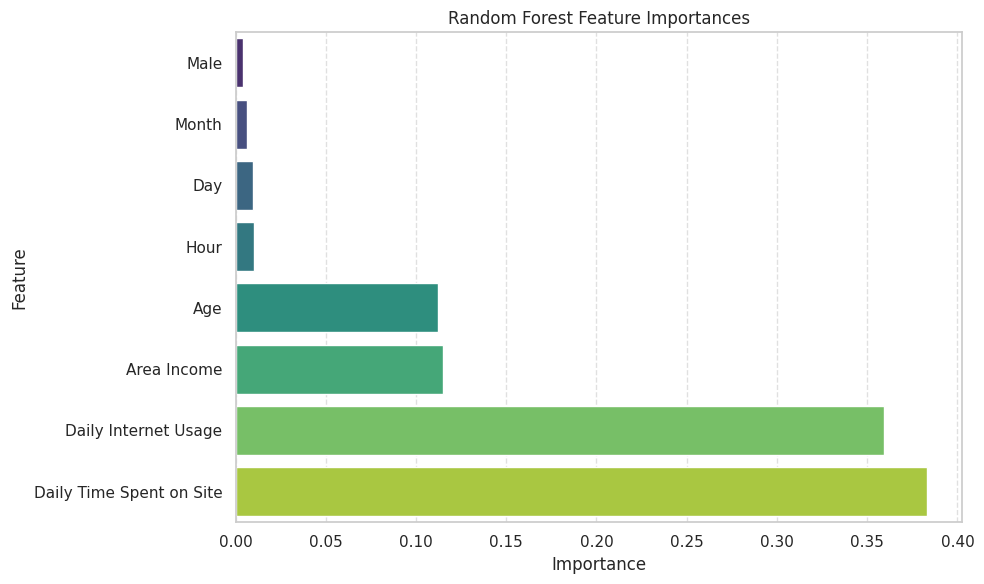

In [ ]:
model = rf_model

importances = model.feature_importances_
feature_names = numeric_features + categorical_features

imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
imp_df = imp_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=imp_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 3.4 KNN

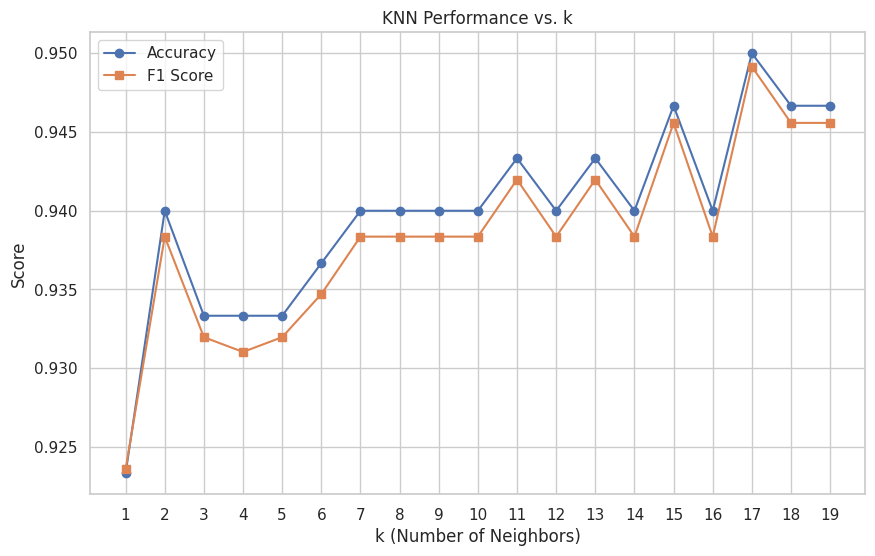

In [ ]:
#HyperParameter Tuning
k_values = range(1, 20)
acc_scores = []
f1_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    acc_scores.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, acc_scores, marker='o', label='Accuracy')
plt.plot(k_values, f1_scores, marker='s', label='F1 Score')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Score')
plt.title('KNN Performance vs. k')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors = 17)
knn_model.fit(X_train_processed, y_train)
y_pred_knn = knn_model.predict(X_test_processed)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("KNN Report")
print(classification_report(y_test, y_pred_knn))

KNN Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       146
           1       0.99      0.91      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
y_train_pred_knn = knn_model.predict(X_train_processed)

acc_train = accuracy_score(y_train, y_train_pred_knn)
acc_test = accuracy_score(y_test, y_pred_knn)

print(f"Train Accuracy: {acc_train:.4f}")
print(f"Test Accuracy : {acc_test:.4f}")

Train Accuracy: 0.9629
Test Accuracy : 0.9500


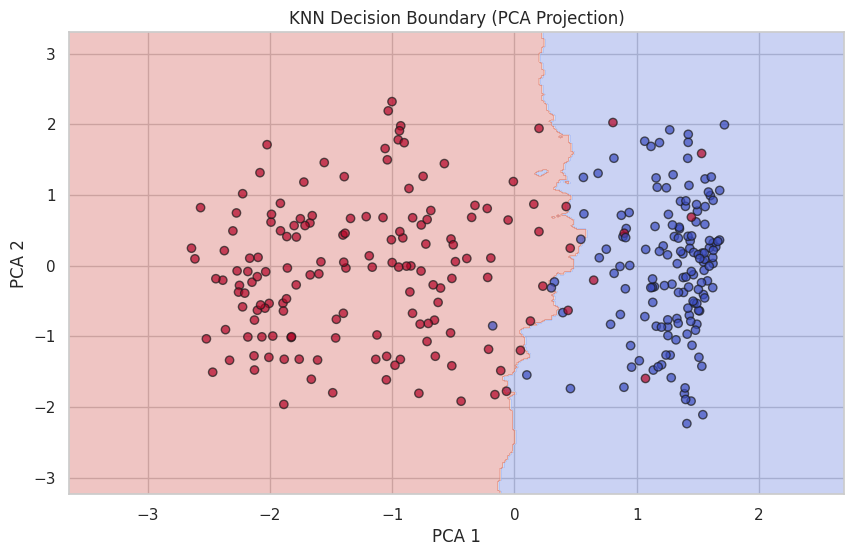

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Train KNN on PCA-transformed training data
knn_model = KNeighborsClassifier(n_neighbors=17)
knn_model.fit(X_train_pca, y_train)

# Create a dense mesh grid
h = 0.02
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the label for each point in the grid
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and actual test data
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("KNN Decision Boundary (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

## 3.5 SVM

Kernel = linear  | F1 Score = 0.9568
Kernel = rbf     | F1 Score = 0.9498
Kernel = poly    | F1 Score = 0.9360
Kernel = sigmoid | F1 Score = 0.9568


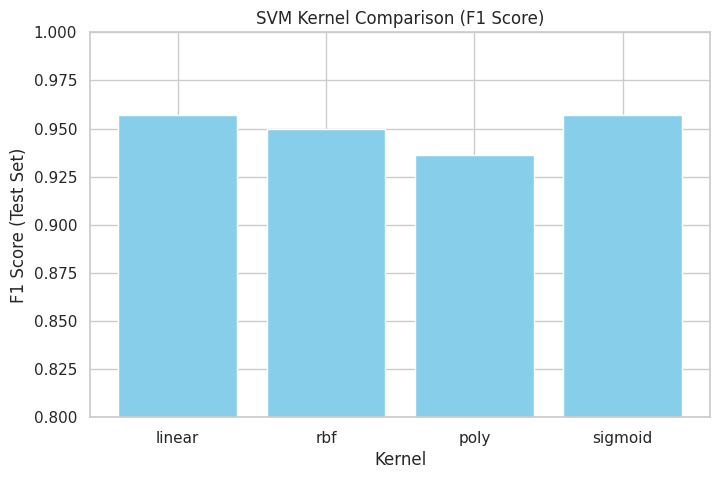

In [ ]:
# HyperParamter Tuning
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
f1_scores = []

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train_processed, y_train)
    preds = model.predict(X_test_processed)
    f1 = f1_score(y_test, preds)
    f1_scores.append(f1)
    print(f"Kernel = {kernel:<7} | F1 Score = {f1:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.bar(kernels, f1_scores, color='skyblue')
plt.title("SVM Kernel Comparison (F1 Score)")
plt.ylabel("F1 Score (Test Set)")
plt.xlabel("Kernel")
plt.ylim(0.8, 1.0)
plt.grid(True, axis='y')
plt.show()


C = 0.0100 | F1 Score = 0.9562
C = 0.0278 | F1 Score = 0.9530
C = 0.0774 | F1 Score = 0.9603
C = 0.2154 | F1 Score = 0.9637
C = 0.5995 | F1 Score = 0.9568
C = 1.6681 | F1 Score = 0.9568
C = 4.6416 | F1 Score = 0.9603
C = 12.9155 | F1 Score = 0.9603
C = 35.9381 | F1 Score = 0.9603
C = 100.0000 | F1 Score = 0.9603


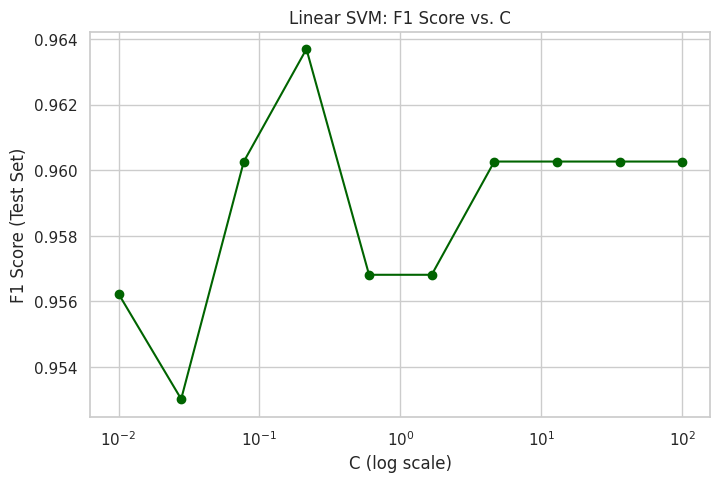

In [ ]:
C_values = np.logspace(-2, 2, 10)  # [0.01, 0.03, ..., 100]
f1_scores = []

for C in C_values:
    model = SVC(kernel='linear', C=C, random_state=42)
    model.fit(X_train_processed, y_train)
    preds = model.predict(X_test_processed)
    f1 = f1_score(y_test, preds)
    f1_scores.append(f1)
    print(f"C = {C:.4f} | F1 Score = {f1:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.plot(C_values, f1_scores, marker='o', color='darkgreen')
plt.xscale('log')
plt.xlabel("C (log scale)")
plt.ylabel("F1 Score (Test Set)")
plt.title("Linear SVM: F1 Score vs. C")
plt.grid(True)
plt.show()

In [ ]:
# SVM
svm_model = SVC(kernel='linear', C=0.2154 , random_state=42)
svm_model.fit(X_train_processed, y_train)
y_pred_svm = svm_model.predict(X_test_processed)

acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
rec_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("SVM Report")
print(classification_report(y_test, y_pred_svm))

SVM Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       146
           1       0.98      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
# Predict on training data
y_train_pred_svm = svm_model.predict(X_train_processed)

# Accuracy
acc_train = accuracy_score(y_train, y_train_pred_svm)
acc_test = accuracy_score(y_test, y_pred_svm)

print(f"Train Accuracy: {acc_train:.4f}")
print(f"Test Accuracy : {acc_test:.4f}")

Train Accuracy: 0.9743
Test Accuracy : 0.9633


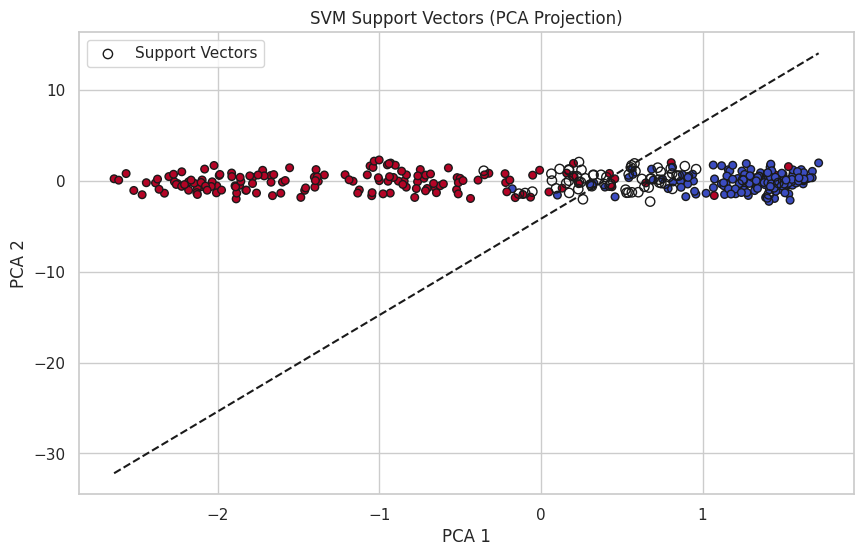

In [ ]:
# Apply PCA to training and test data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

# Train a linear SVM on the PCA-reduced training data
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_pca, y_train)

# Plot the decision boundary and support vectors using the test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='coolwarm', s=30, edgecolors='k')
plt.title("SVM Support Vectors (PCA Projection)")

# Compute linear decision boundary
w = svm_model.coef_[0]
b = svm_model.intercept_[0]
x = np.linspace(X_test_pca[:, 0].min(), X_test_pca[:, 0].max())
y = -(w[0] * x + b) / w[1]
plt.plot(x, y, 'k--')

# Highlight support vectors (from training set)
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=45,
            facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.legend()
plt.show()

## 3.6 Naive Bayes

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_processed, y_train)
y_pred_nb = nb_model.predict(X_test_processed)

acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

print("Naive Bayes Report")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       146
           1       0.96      0.96      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



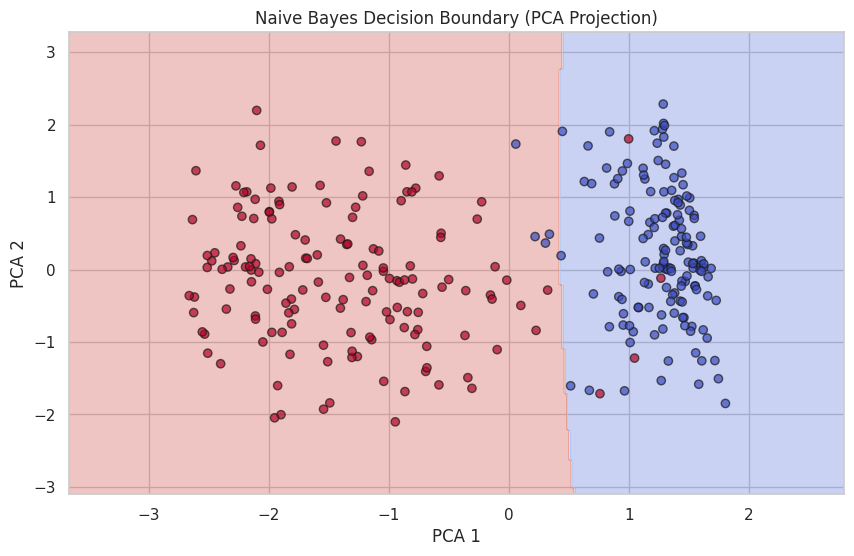

In [ ]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train_processed)
X_test_2d = pca.transform(X_test_processed)

# Re-train Naive Bayes on 2D data for plotting
nb_model_2d = GaussianNB()
nb_model_2d.fit(X_train_2d, y_train)

# Create mesh grid
h = 0.02
x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict over mesh grid
Z = nb_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title("Naive Bayes Decision Boundary (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [ ]:
y_train_pred_nb = nb_model.predict(X_train_processed)

# Accuracy comparison
acc_train_nb = accuracy_score(y_train, y_train_pred_nb)
acc_test_nb = accuracy_score(y_test, y_pred_nb)

print(f"Train Accuracy: {acc_train_nb:.4f}")
print(f"Test Accuracy : {acc_test_nb:.4f}")

Train Accuracy: 0.9657
Test Accuracy : 0.9600


## 4. Final Comparison Between Models

In [ ]:
# Summary Table
results_df = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Accuracy': acc_lr, 'Precision': prec_lr, 'Recall': rec_lr, 'F1 Score': f1_lr},
    {'Model': 'Decision Tree',        'Accuracy': acc_dt, 'Precision': prec_dt, 'Recall': rec_dt, 'F1 Score': f1_dt},
    {'Model': 'Random Forest',        'Accuracy': acc_rf, 'Precision': prec_rf, 'Recall': rec_rf, 'F1 Score': f1_rf},
    {'Model': 'KNN',                  'Accuracy': acc_knn, 'Precision': prec_knn, 'Recall': rec_knn, 'F1 Score': f1_knn},
    {'Model': 'SVM',                  'Accuracy': acc_svm, 'Precision': prec_svm, 'Recall': rec_svm, 'F1 Score': f1_svm},
    {'Model': 'Naive Bayes',          'Accuracy': acc_nb, 'Precision': prec_nb, 'Recall': rec_nb, 'F1 Score': f1_nb},
])

results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
print("📊 Model Comparison Table (sorted by F1 Score)")
display(results_df)

# Extract and format the best model row
best_model_row = results_df.iloc[[0]]
print("✅ Best Performing Model:")
display(best_model_row)

📊 Model Comparison Table (sorted by F1 Score)


Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.980000   0.986486  0.973333  0.979866
1                  SVM  0.963333   0.979866  0.948052  0.963696
2          Naive Bayes  0.960000   0.961039  0.961039  0.961039
3        Random Forest  0.953333   0.948718  0.961039  0.954839
4                  KNN  0.950000   0.992908  0.909091  0.949153
5        Decision Tree  0.940000   0.953333  0.928571  0.940789

✅ Best Performing Model:


Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression      0.98   0.986486  0.973333  0.979866

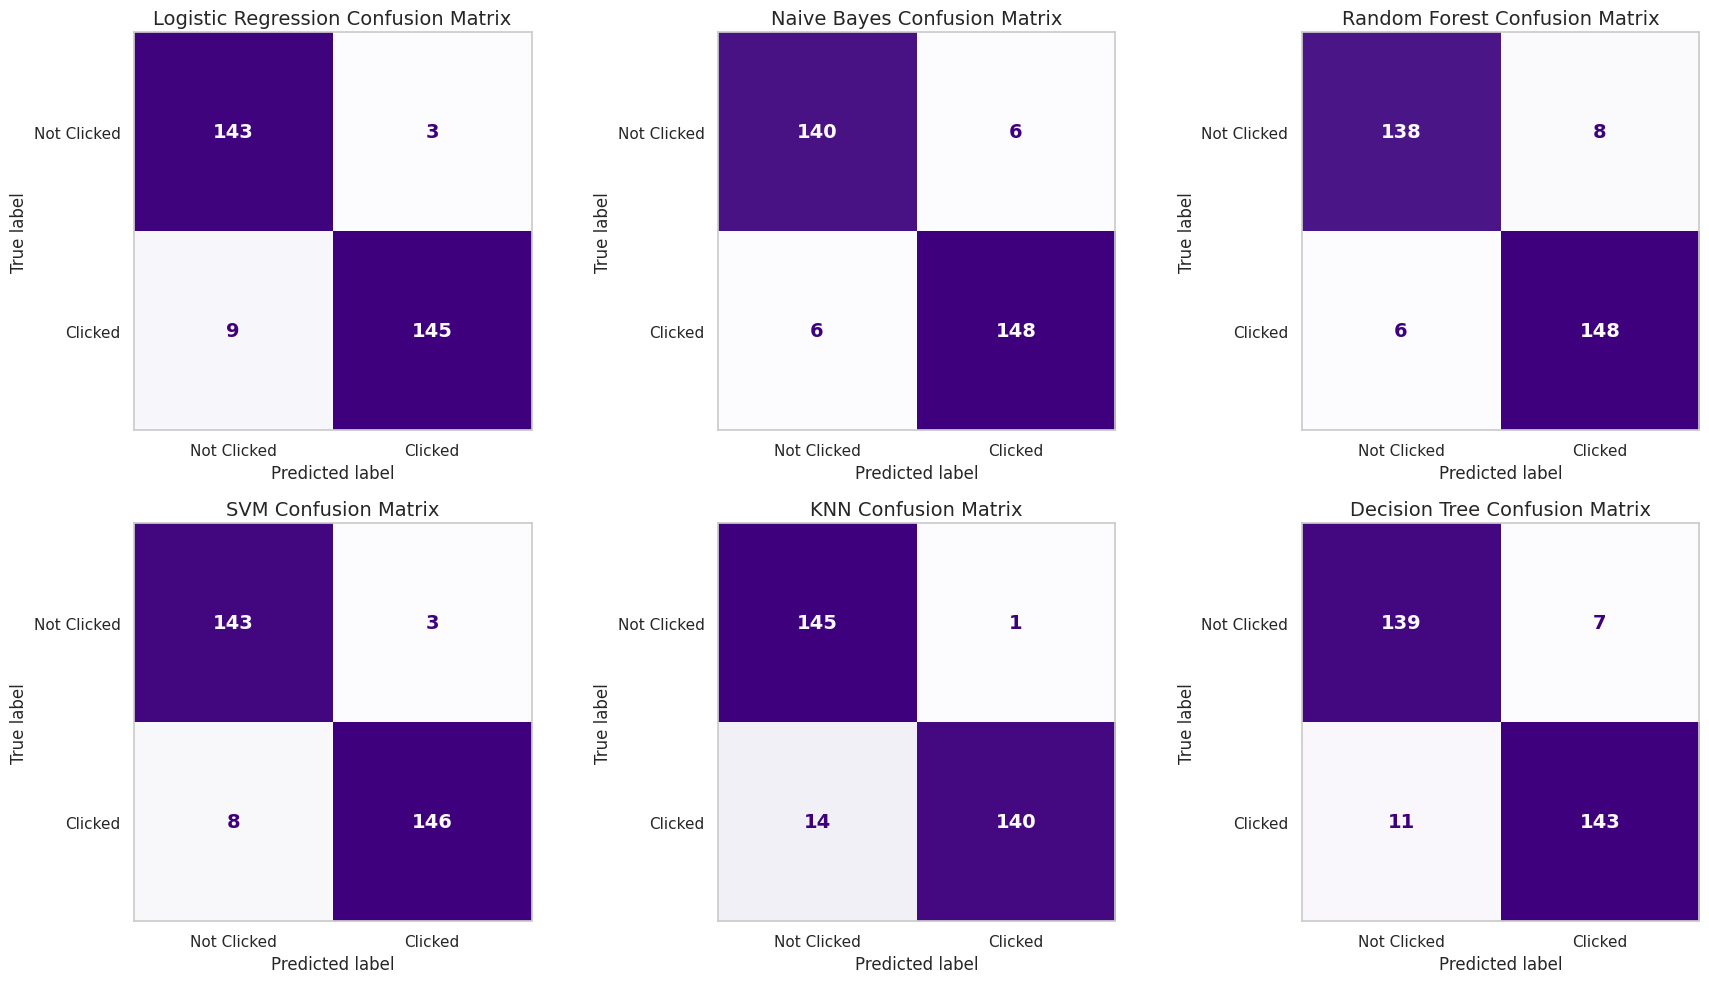

In [ ]:
model_names = [
    'Logistic Regression', 'Naive Bayes', 'Random Forest',
    'SVM', 'KNN', 'Decision Tree'
]

model_instances = [
    lr_model, nb_model, rf_model,
    svm_model, knn_model, dt_model
]

y_preds = [
    y_pred_lr, y_pred_nb, y_pred_rf,
    y_pred_svm, y_pred_knn, y_pred_dt
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(zip(model_names, y_preds)):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred,
        ax=axes[i],
        display_labels=['Not Clicked', 'Clicked'],
        cmap='Purples',  # Changed colormap to Purples
        colorbar=False
    )

    for row in disp.text_:
        for text in row:
            text.set_fontsize(14)
            text.set_fontweight('bold')

    axes[i].grid(False)
    axes[i].set_title(f'{name} Confusion Matrix', fontsize=14)

plt.tight_layout()
plt.show()

## 5. Unsupervised Learning

## 5.1 KMeans

In [ ]:
features = df_model

scaled = StandardScaler().fit_transform(features)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled)

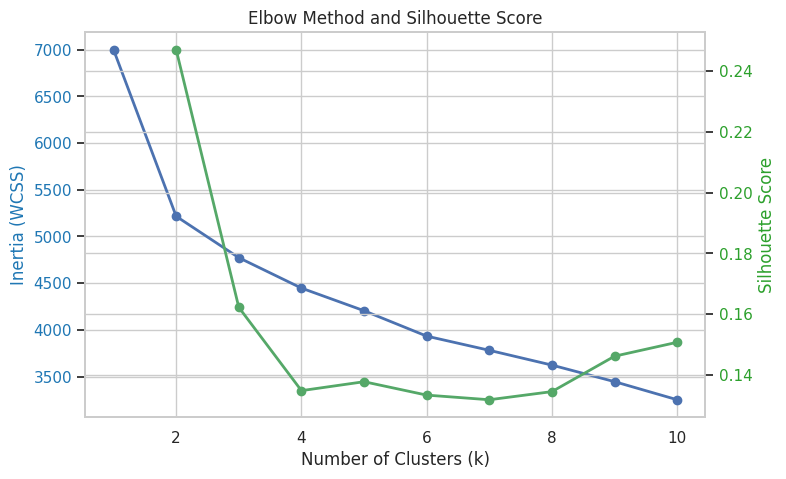

In [ ]:
inertia = []
silhouette = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

    if k > 1:
        score = silhouette_score(scaled, kmeans.labels_)
        silhouette.append(score)
    else:
        silhouette.append(None)

fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (WCSS)', color=color)
ax1.plot(k_range, inertia, 'bo-', label='Inertia', linewidth=2, markersize=6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(k_range, silhouette, 'go-', label='Silhouette Score', linewidth=2, markersize=6)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method and Silhouette Score')
plt.show()

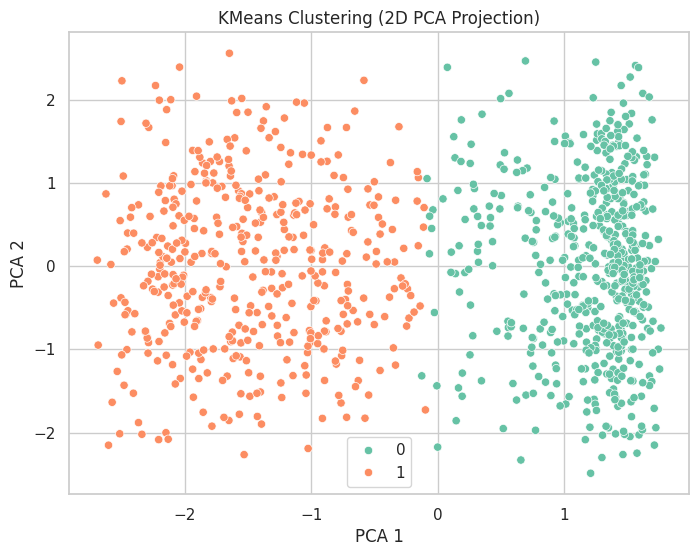

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=clusters, palette='Set2')
plt.title("KMeans Clustering (2D PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [ ]:
sil_score = silhouette_score(scaled, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.2471


## 5.2 Hierarchical Clustering

In [ ]:
# 1. Preprocess: Scale features
features = df_model
scaled = StandardScaler().fit_transform(features)

# 2. Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')  # You can change linkage='average' or 'complete'
agglo_labels = agglo.fit_predict(scaled)

# 3. PCA for 2D visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

In [ ]:
sil_score = silhouette_score(scaled, agglo_labels)
print(f"Silhouette Score (Hierarchical Clustering): {sil_score:.4f}")

Silhouette Score (Hierarchical Clustering): 0.2365


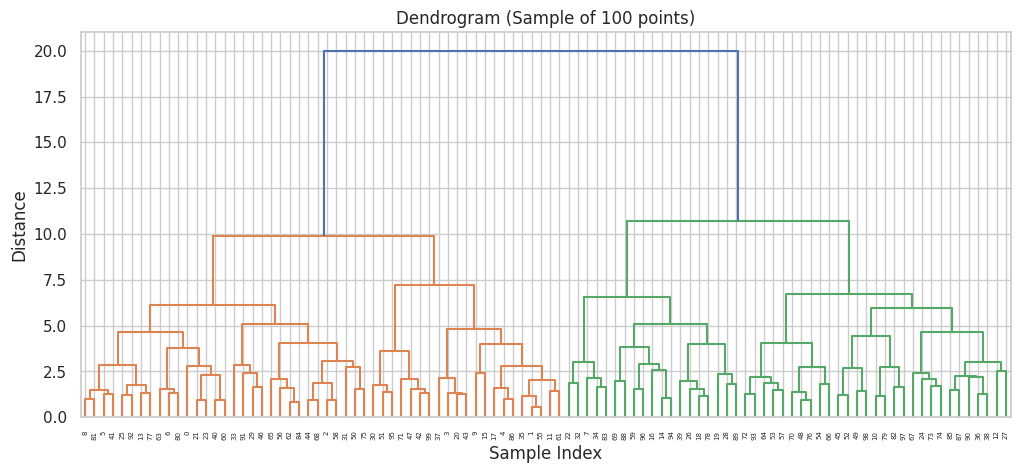

In [ ]:
plt.figure(figsize=(12, 5))
sample_linkage = linkage(scaled[:100], method='ward')
dendrogram(sample_linkage)
plt.title('Dendrogram (Sample of 100 points)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

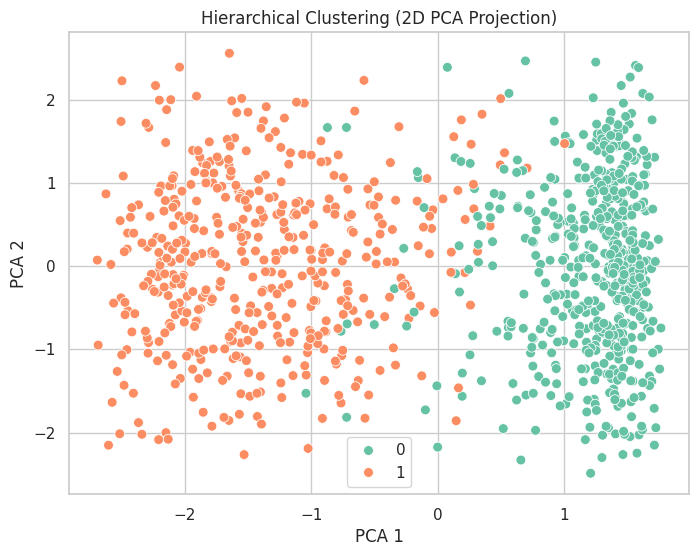

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=agglo_labels, palette='Set2', s=50)
plt.title('Hierarchical Clustering (2D PCA Projection)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

## 6. Interpretations


## Final Summary & Insights
-  **Best Performing Model:** Based on both test set and cross-validation results, Logistic Regression consistently achieved the highest F1 scores, followed closely by SVM. Both models demonstrated excellent balance between precision and recall, with minimal overfitting.
-  **Unsupervised Learning Insight:** The results show very poor performance for unsupervised learning models because the dataset is highly homogeneous and lacks distinct clustering structure without label guidance.


